### 新 API


#### 基本使用

In [2]:
from mp_api.client import MPRester

with MPRester("your-api-key") as mpr:
    docs = mpr.materials.summary.search(material_ids=["mp-149"])
    # docs = mpr.materials.summary.search(material_ids=["mp-149"], fields=["structure"])

Retrieving SummaryDoc documents: 100%|██████████| 1/1 [00:00<00:00, 24244.53it/s]


In [3]:
docs

[MPDataDoc<SummaryDoc>(
 builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 46, 57, 168000), license='BY-C'),
 nsites=2,
 elements=[Element Si],
 nelements=1,
 composition=Composition('Si2'),
 composition_reduced=Composition('Si1'),
 formula_pretty='Si',
 formula_anonymous='A',
 chemsys='Si',
 volume=40.32952684741405,
 density=2.312800253345134,
 density_atomic=20.164763423707026,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='2.0.2'),
 property_name='summary',
 material_id=MPID(mp-149),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2023, 11, 22, 19, 46, 57, 169000),
 origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1947498), last_updated=datetime.datetime(2021, 3, 5, 11, 47, 3, 84000)), PropertyOrigin(name='energy', task_id=MPID(mp

In [4]:
structure = docs[0].structure
structure

Structure Summary
Lattice
    abc : 3.8492784033699095 3.8492794116013456 3.849278
 angles : 60.00001213094421 60.00000346645984 60.00001097545789
 volume : 40.32952684741405
      A : 3.333573 0.0 1.924639
      B : 1.111191 3.142924 1.924639
      C : 0.0 0.0 3.849278
    pbc : True True True
PeriodicSite: Si (3.889, 2.75, 6.736) [0.875, 0.875, 0.875]
PeriodicSite: Si (0.5556, 0.3929, 0.9623) [0.125, 0.125, 0.125]

#### 三元相图 convex hull 绘制

In [1]:
from mp_api.client import MPRester
from emmet.core.thermo import ThermoType

with MPRester("pmn1XF3bkhaLnu0q3olXrSFk8MRZNfB2") as mpr:

    # -- GGA/GGA+U/R2SCAN mixed phase diagram
    pd = mpr.materials.thermo.get_phase_diagram_from_chemsys(
        chemsys="Ti-Al-Nb",
        thermo_type=ThermoType.GGA_GGA_U,
    )

/home/leubuntu/src/miniconda3/envs/base_ysl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving ThermoDoc documents: 100%|██████████| 1/1 [00:00<00:00, 10782.27it/s]


In [2]:
pd

Ti-Nb-Al phase diagram
11 stable phases: 
Ti3NbAl2, Ti2NbAl, Al, Ti3Al, NbAl3, Nb2Al, TiAl, TiAl3, TiAl2, Ti, Nb

In [3]:
# 默认 backend 为 plotly，在 GitHub repo 中会无法显示
pd.get_plot()

`pd.get_plot()` 默认参属下绘制的图：

![phase_diagram_plotly](assets/mpi_phase_diagram.png)

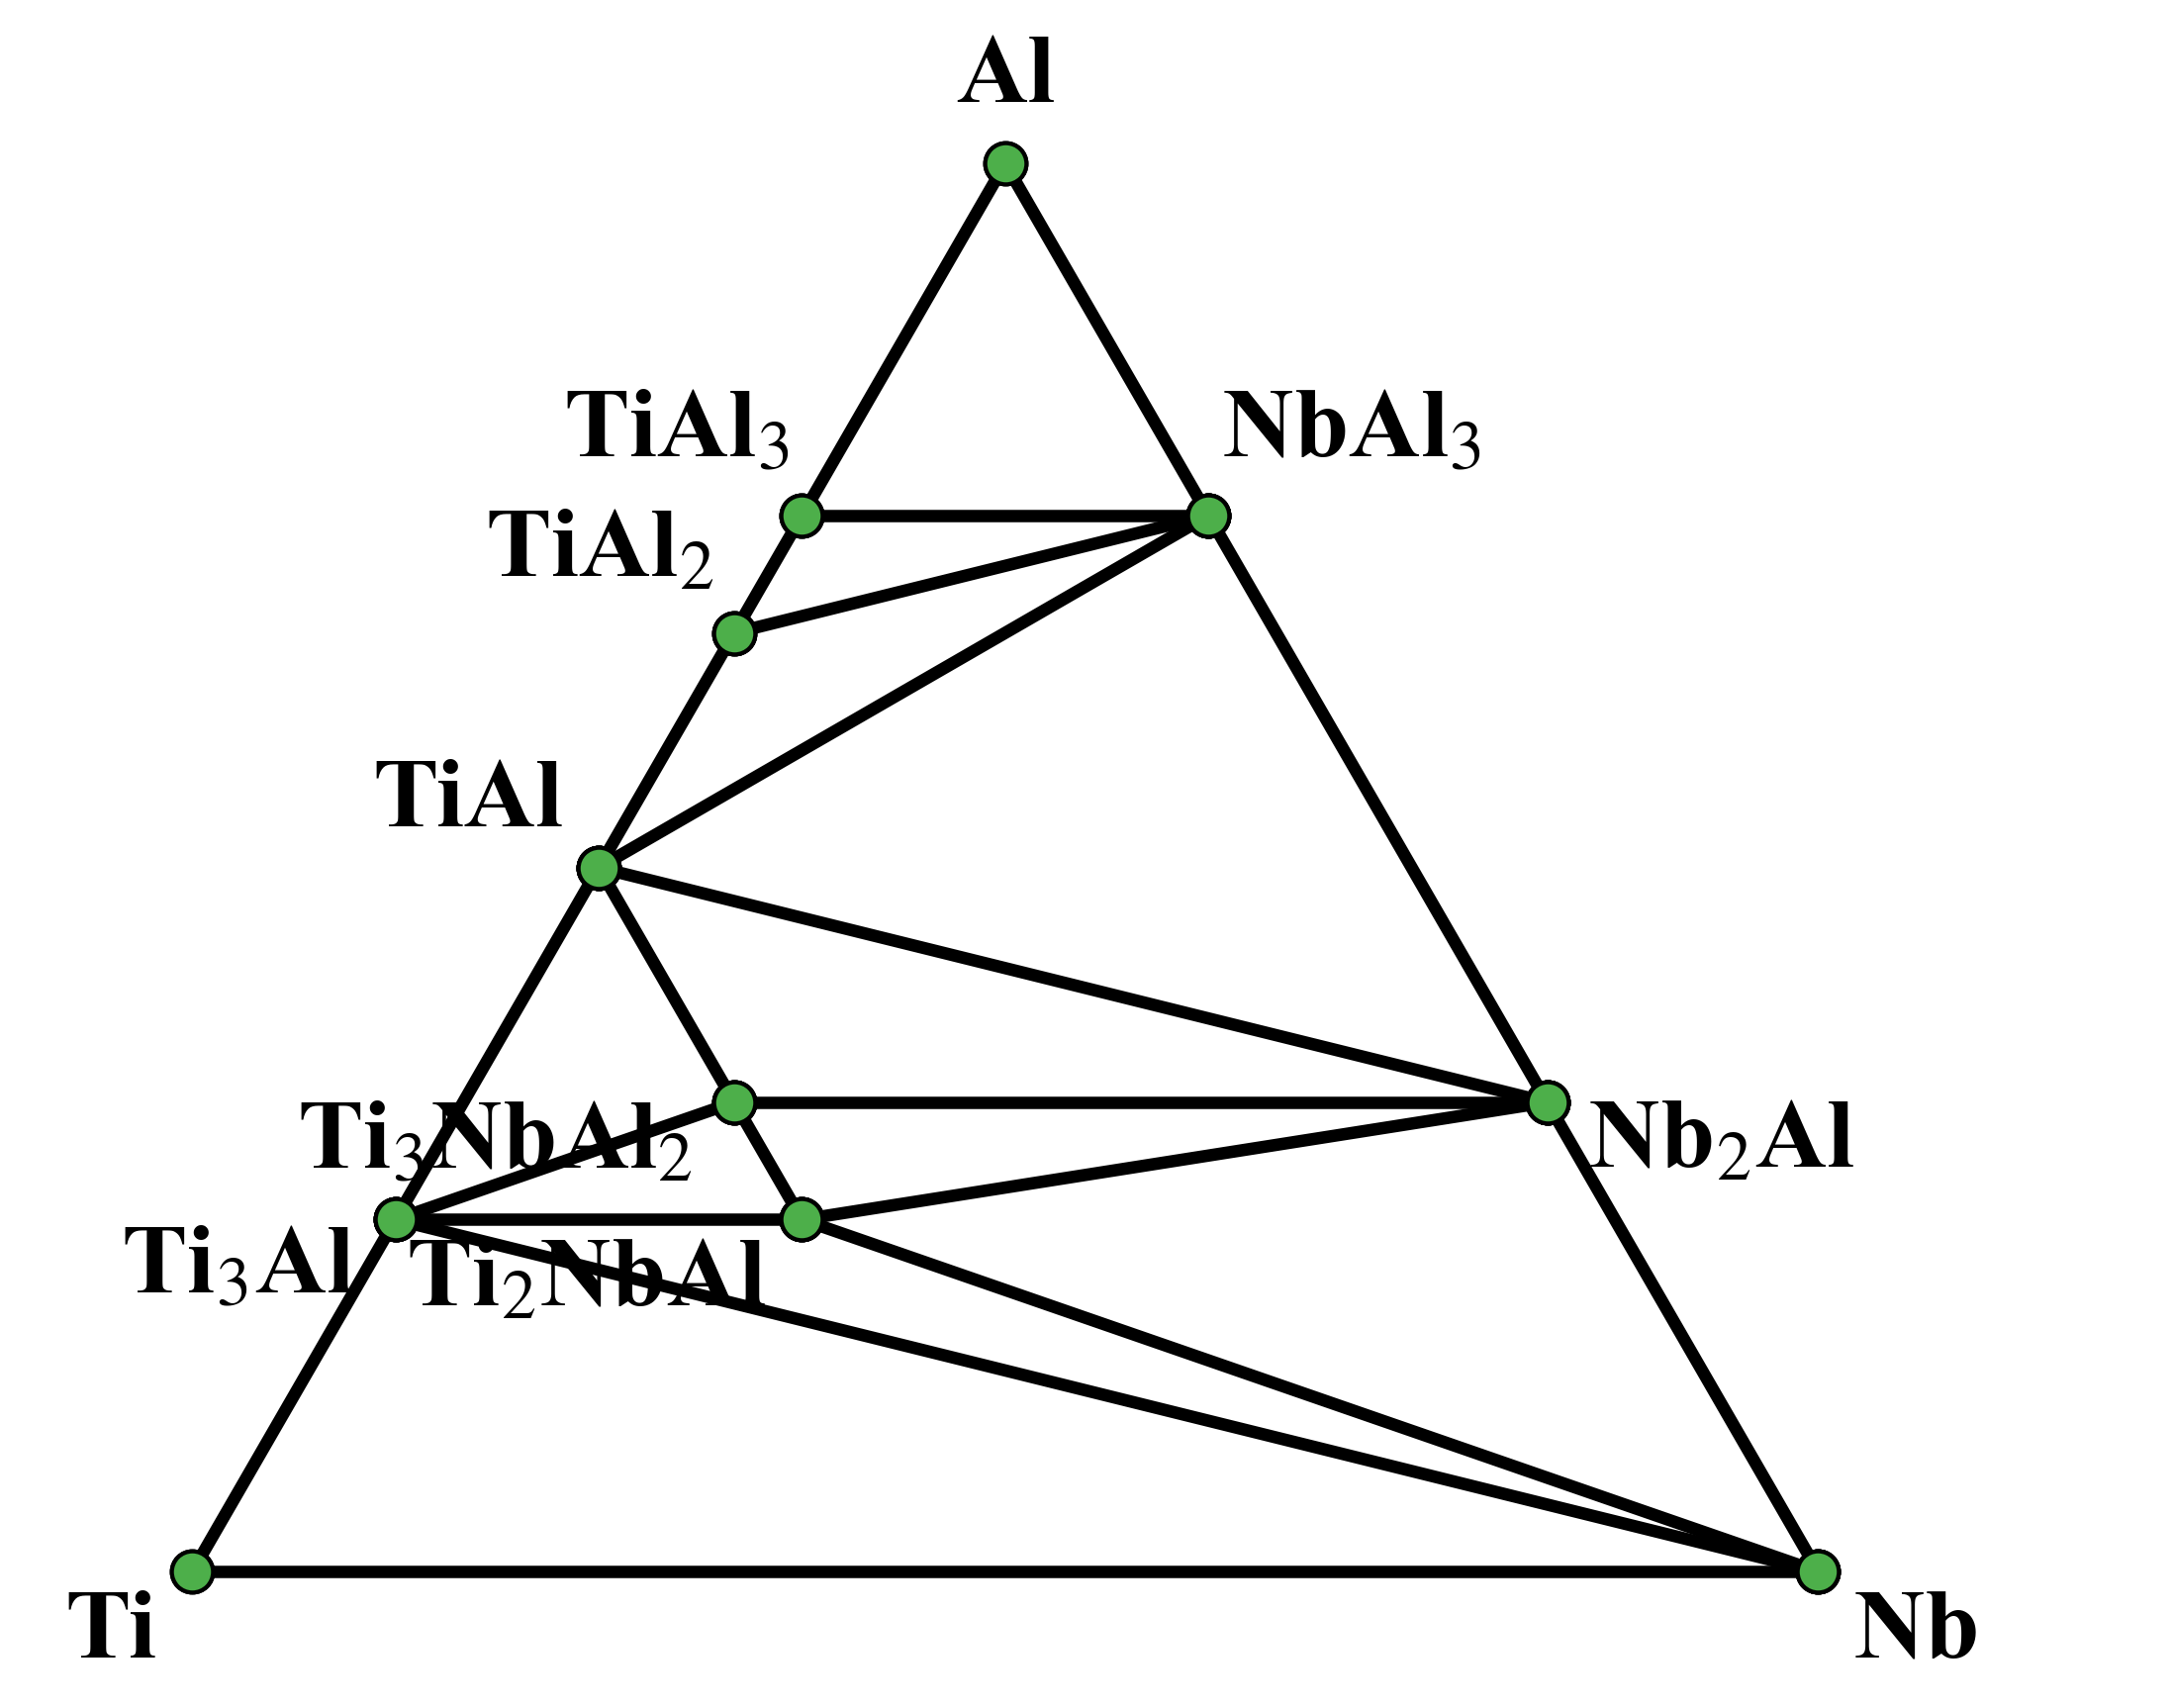

In [4]:
from spt.plot_params import set_roman_plot_params

set_roman_plot_params()

# backend 采用 matplotlib，且不显示不稳定相
ax = pd.get_plot(backend="matplotlib", show_unstable=False)

保存图片：`ax.figure.savefig("xxx.png")`

#### 四元相图 convex hull 绘制

In [1]:
from pymatgen.analysis.phase_diagram import PhaseDiagram
from mp_api.client import MPRester

API_KEY = "pmn1XF3bkhaLnu0q3olXrSFk8MRZNfB2"

with MPRester(API_KEY) as mpr:
    mp_ents = mpr.get_entries_in_chemsys("Y-Ba-Cu-O")

/opt/homebrew/Caskroom/miniconda/base/envs/base_ysl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving ThermoDoc documents: 100%|██████████| 225/225 [00:00<00:00, 2817069.85it/s]


In [2]:
pd = PhaseDiagram(mp_ents)

In [3]:
pd

Ba-Y-Cu-O phase diagram
26 stable phases: 
YCu7O12, YCu, BaO2, BaO10, Y, Ba, O2, BaO, CuO, Y(CuO2)2, Y2O3, YCu2, YCu5, Cu, BaCu, Cu2O, BaY2O4, Ba2(CuO2)3, Ba4Y(CuO3)3, Ba2Y(CuO2)4, Ba(CuO)2, Cu2O3, Ba2Cu2O5, Y6Cu11O24, Ba2CuO3, BaCuO2

In [4]:
pd.get_plot()

四元相图 plotly 绘制图：

![quaternary_phase_diagram](assets/quaternary_phase_diagram.png)

<Axes3D: >

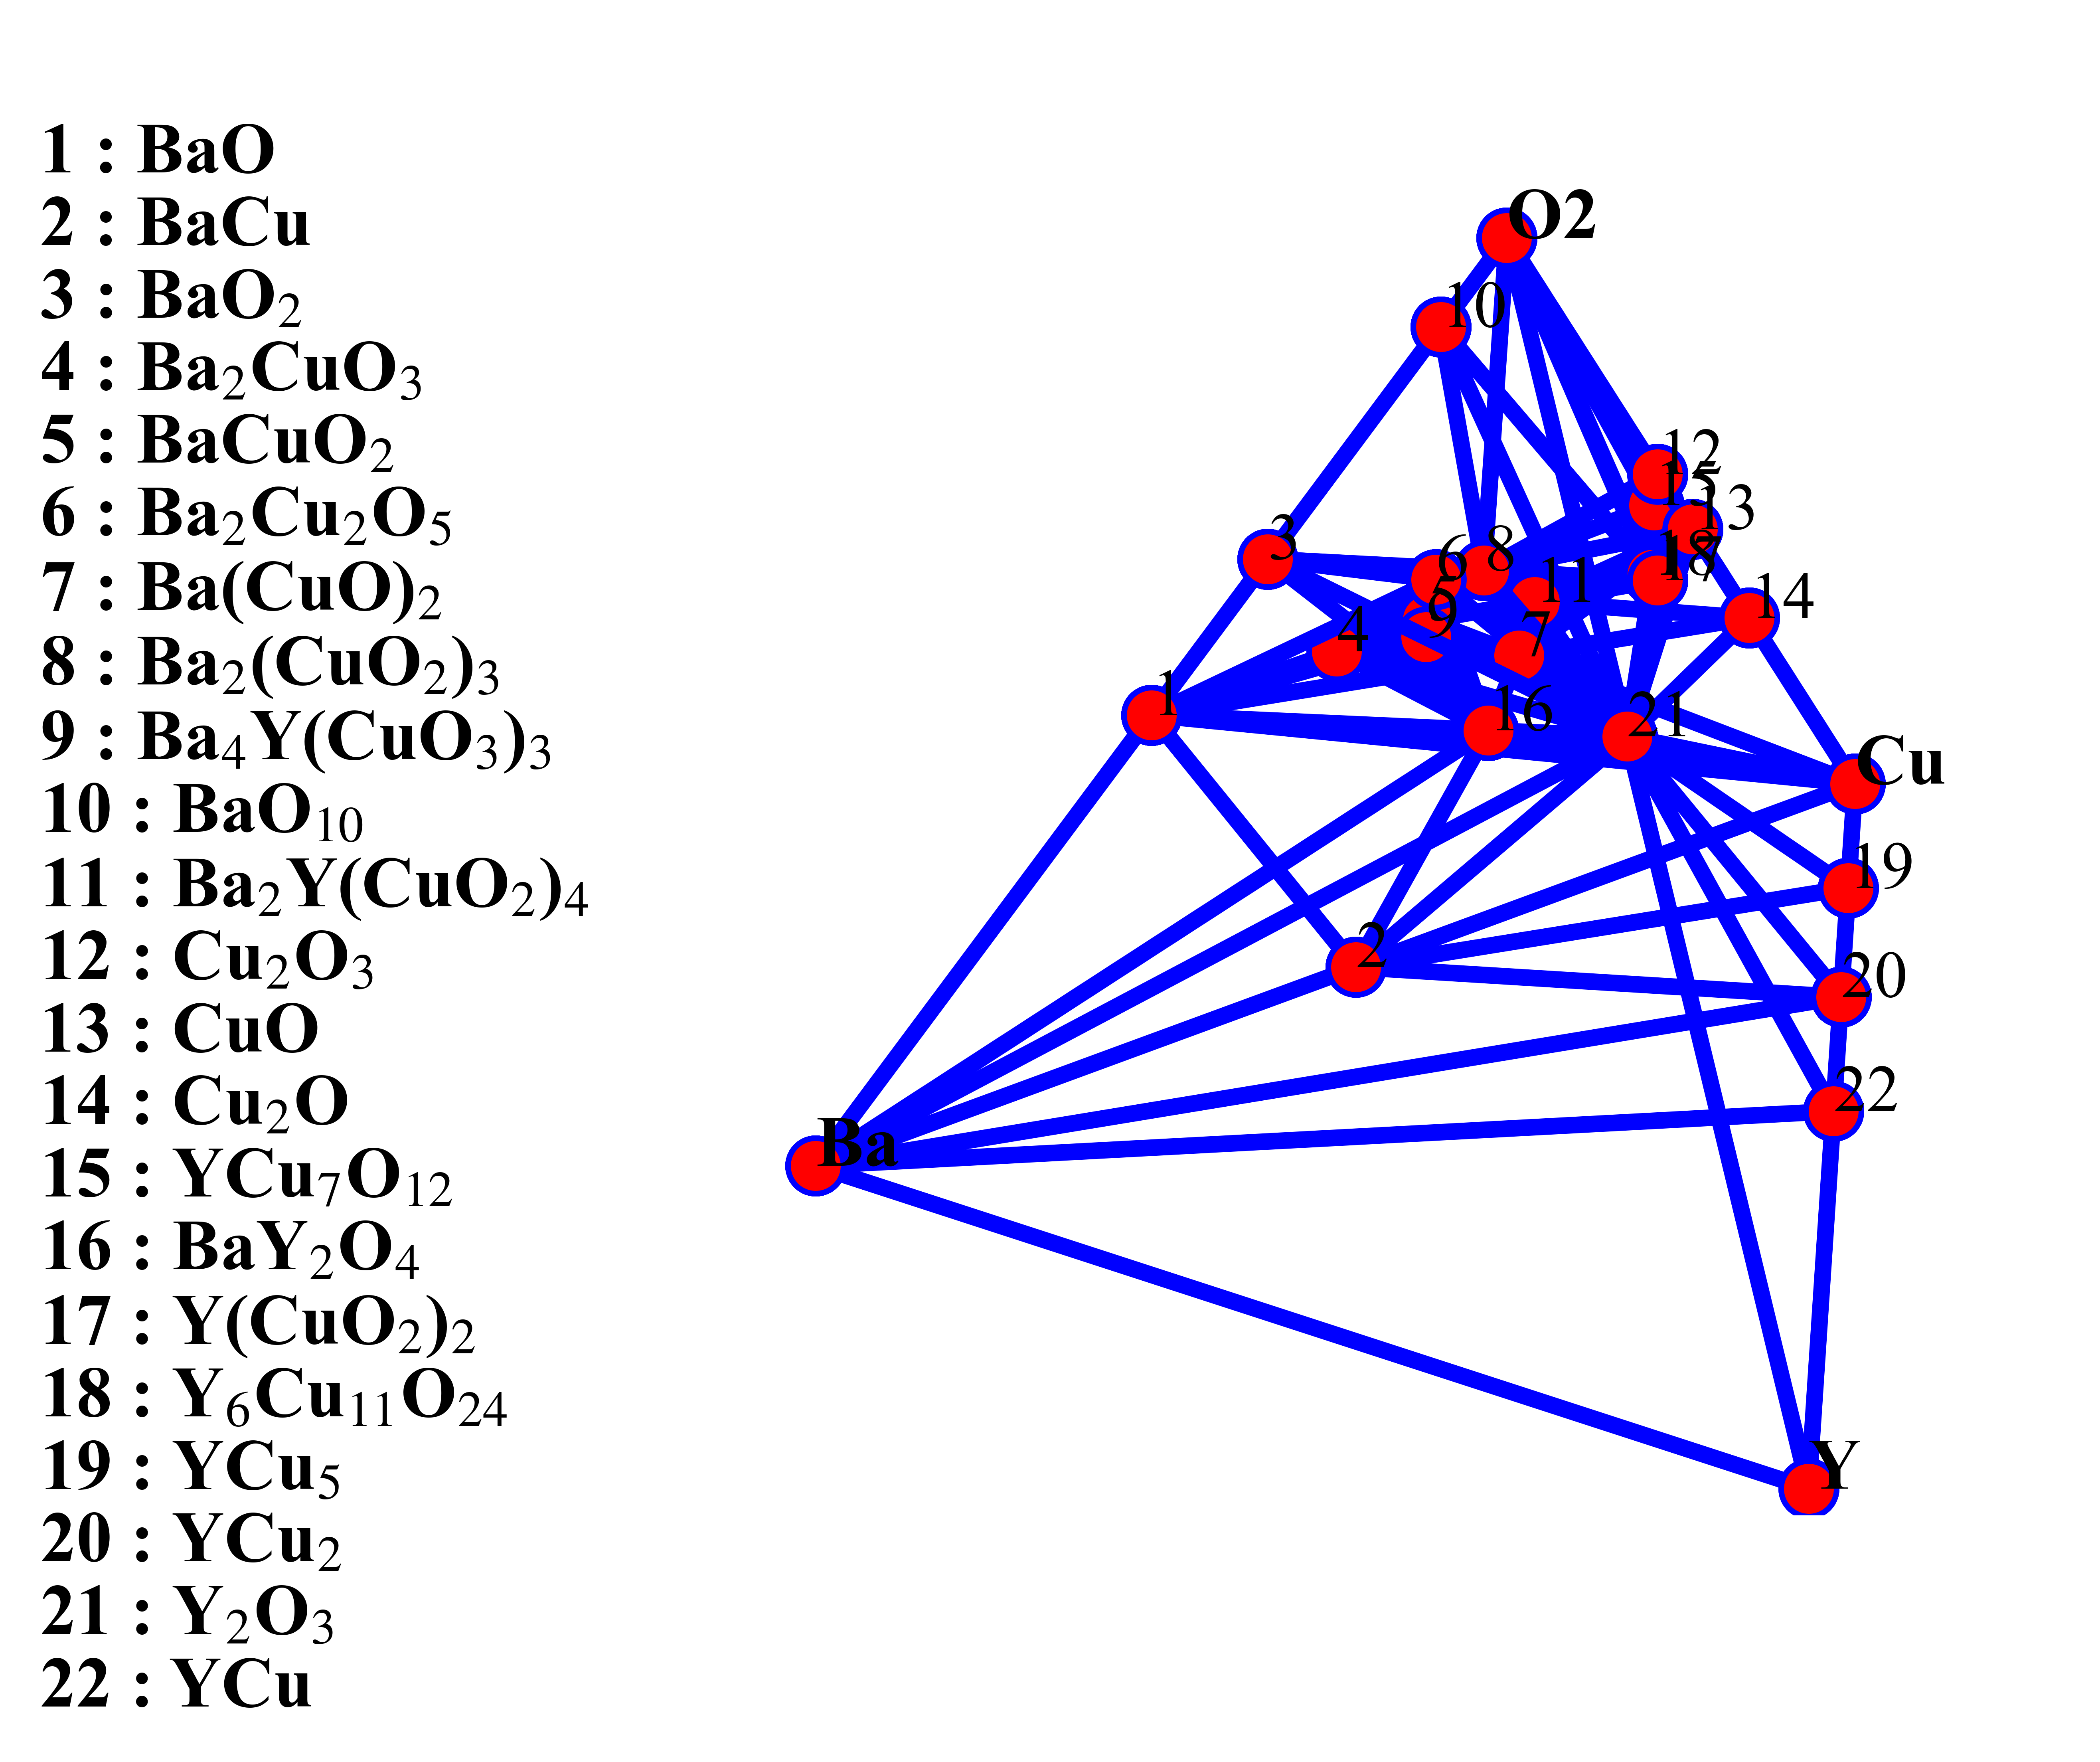

In [5]:
from spt.plot_params import set_roman_plot_params

set_roman_plot_params()

pd.get_plot(
    backend="matplotlib",
    energy_colormap="jet",
)